In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

## Load Data

In [4]:
data_test= pd.read_csv("./datasets/data_set_ALL_AML_independent.csv")
data_train= pd.read_csv("./datasets/data_set_ALL_AML_train.csv")
target= pd.read_csv("./datasets/actual.csv")

In [5]:
data_train.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [6]:
data_test.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


## Data Cleaning

In [7]:
GAN=data_train['Gene Accession Number'].values

In [8]:
np.unique(data_train['Gene Accession Number'].values == data_test['Gene Accession Number'].values)

array([ True])

In [9]:
traindrop=[]
for col in data_train.columns[:]:
    try:
        int(col)
    except:
        traindrop.append(col)
testdrop=[]
for col in data_test.columns[:]:
    try:
        int(col)
    except:
        testdrop.append(col)

In [10]:
data_train=data_train.drop(columns=traindrop)
data_test=data_test.drop(columns=testdrop)

In [11]:
data_train.columns, data_test.columns

(Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
        '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
        '26', '27', '34', '35', '36', '37', '38', '28', '29', '30', '31', '32',
        '33'],
       dtype='object'),
 Index(['39', '40', '42', '47', '48', '49', '41', '43', '44', '45', '46', '70',
        '71', '72', '68', '69', '67', '55', '56', '59', '52', '53', '51', '50',
        '54', '57', '58', '60', '61', '65', '66', '63', '64', '62'],
       dtype='object'))

In [12]:
data_train.shape, data_test.shape

((7129, 38), (7129, 34))

In [13]:
train_data= pd.DataFrame(data_train.values.T, columns=GAN, index=data_train.columns)
test_data= pd.DataFrame(data_test.values.T, columns=GAN, index=data_test.columns)

In [14]:
data_unsorted=pd.concat([train_data, test_data], axis=0)

In [15]:
data_unsorted.index=data_unsorted.index.astype(int)

In [16]:
data=data_unsorted.sort_index()

In [17]:
target.index=range(1,73)

In [18]:
target=target.drop(columns=['patient'])

In [19]:
targets_num=[]
for val in (target.cancer.values):
    if val=='ALL':
        targets_num.append(1)
    else:
        targets_num.append(0)

In [20]:
target=np.array(targets_num)

In [27]:
X=data
Y=target

## Cleaned Data Export

In [28]:
joblib.dump(X,"./X_Y_data/X.data")
joblib.dump(Y,"./X_Y_data/Y.data")

['./X_Y_data/Y.data']

## Load Cleaned Data

In [58]:
df=joblib.load("./X_Y_data/X.data")
y=joblib.load("./X_Y_data/Y.data")

In [59]:
df.head()

,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [60]:
df.shape

(72, 7129)

In [61]:
X=df.values

## Feature Engineering

### Standard Scaler

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler= StandardScaler()
X_scaled=scaler.fit_transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### PCA

In [64]:
from sklearn.decomposition import PCA

In [96]:
pca=PCA(4)
X_pca=pca.fit_transform(X_scaled)

In [97]:
X_pca.shape

(72, 4)

In [98]:
pca.components_

array([[-1.11032085e-02, -1.45376017e-02, -5.34479641e-03, ...,
         9.67595726e-03,  9.47325730e-04, -1.68845025e-05],
       [ 3.80651164e-04,  3.21312353e-03, -2.45425839e-03, ...,
         1.31002809e-02, -5.93297723e-03, -2.96068332e-04],
       [ 7.04782543e-03,  1.64288425e-02,  7.35848385e-03, ...,
         2.31054741e-03,  2.16713383e-02,  9.59317063e-03],
       [ 6.54122467e-03, -1.89789580e-02,  6.92455443e-04, ...,
        -1.02236685e-02, -5.59780971e-03, -2.50872586e-03]])

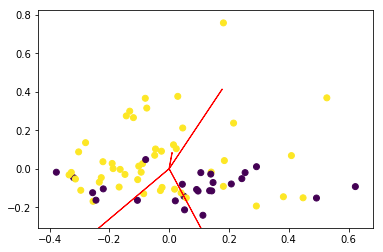

In [103]:
scalex=1/(X_pca[:,0].max()-X_pca[:,0].min())
scaley=1/(X_pca[:,1].max()-X_pca[:,1].min())


plt.scatter(X_pca[:,0]*(scalex),X_pca[:,1]*(scaley),c=y)
for i in range(pca.components_.shape[0]):
    plt.arrow(0,0,pca.components_[i,0]*25,pca.components_[i,1]*25, color='r', alpha=1)
plt.show()

### Model based Feature Selecton

[0. 0. 0. ... 0. 0. 0.]


<BarContainer object of 7129 artists>

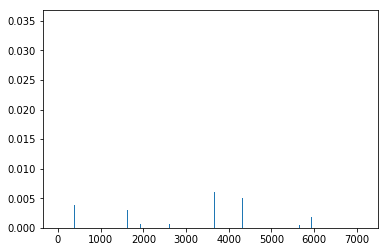

In [208]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100, random_state=32)
rfc.fit(X,y)
print(rfc.feature_importances_)

plt.bar(range(7129),rfc.feature_importances_)

In [209]:
fi=rfc.feature_importances_

In [210]:
to_drop=[]
for f,i in zip(fi,range(fi.shape[0])):
    if f==0:
        to_drop.append(i)


In [211]:
len(to_drop)

6795

In [212]:
cols_todrop=[]
for col,i in zip(df.columns,range(len(df.columns))):
    if i in to_drop:
        cols_todrop.append(col)

In [213]:
df_dropped=df.drop(columns=cols_todrop)

In [214]:
X_dropped=df_dropped.values

In [215]:
X_scaled=scaler.fit_transform(X_dropped)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Train Test Split

In [216]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_scaled,Y, random_state=43, test_size=0.25)

## By Logistic Regression

In [217]:
from sklearn.linear_model import LogisticRegression

In [218]:
def acc(model):
    print("Train Accuracy:",model.score(X_train,y_train)*100,'%','\nTest Accuracy:', model.score(X_test, y_test)*100,'%')

In [219]:
lr= LogisticRegression()
lr.fit(X_train, y_train)
acc(lr)

Train Accuracy: 100.0 % 
Test Accuracy: 100.0 %


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C: 0.001
Train Accuracy: 98.14814814814815 % 
Test Accuracy: 100.0 %
C: 0.01
Train Accuracy: 100.0 % 
Test Accuracy: 100.0 %
C: 0.1
Train Accuracy: 100.0 % 
Test Accuracy: 100.0 %
C: 1
Train Accuracy: 100.0 % 
Test Accuracy: 100.0 %
C: 10
Train Accuracy: 100.0 % 
Test Accuracy: 100.0 %
C: 100
Train Accuracy: 100.0 % 
Test Accuracy: 100.0 %
C: 1000
Train Accuracy: 100.0 % 
Test Accuracy: 100.0 %


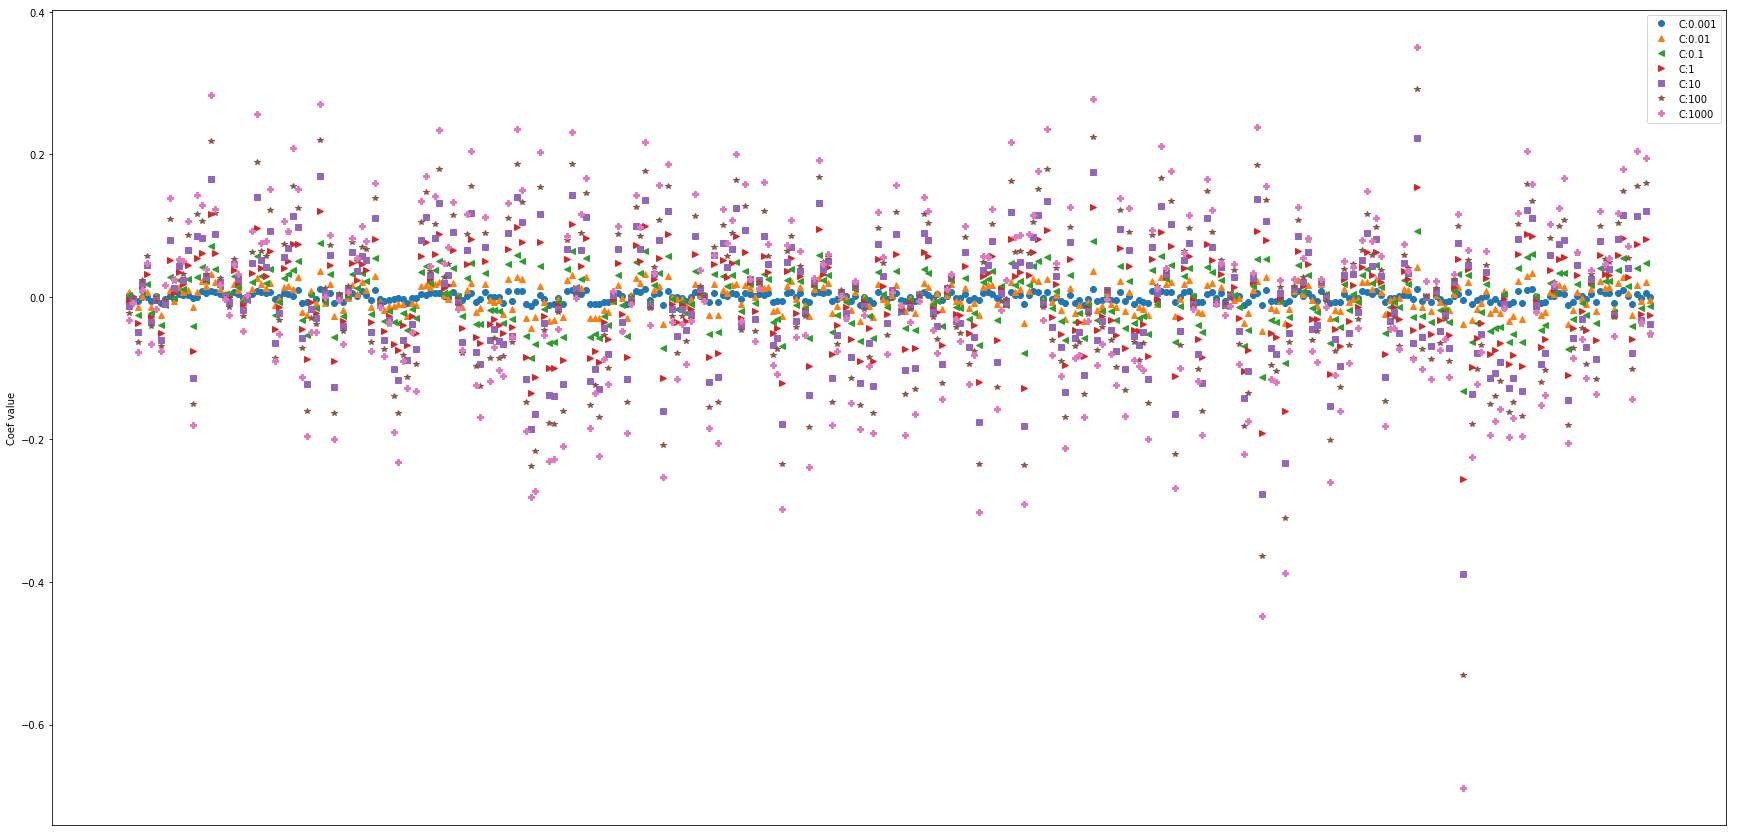

In [220]:
C=[0.001,0.01,0.1,1,10,100,1000]
plt.figure(figsize=(30,15))
for c, marker in zip(C, ['o','^','<','>','s','*','P']):
    lr=LogisticRegression(C=c, solver='lbfgs')
    lr.fit(X_train,y_train)
    print("C:",c)
    acc(lr)
    plt.plot(lr.coef_.T, marker, label=("C:"+str(c)))
plt.xticks(())
plt.ylabel("Coef value")
plt.legend()
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C: 0.001
Train Accuracy: 37.03703703703704 % 
Test Accuracy: 27.77777777777778 %


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

C: 0.01
Train Accuracy: 37.03703703703704 % 
Test Accuracy: 27.77777777777778 %
C: 0.1
Train Accuracy: 96.29629629629629 % 
Test Accuracy: 94.44444444444444 %
C: 1
Train Accuracy: 100.0 % 
Test Accuracy: 100.0 %
C: 10
Train Accuracy: 100.0 % 
Test Accuracy: 100.0 %
C: 100
Train Accuracy: 100.0 % 
Test Accuracy: 100.0 %
C: 1000
Train Accuracy: 100.0 % 
Test Accuracy: 100.0 %


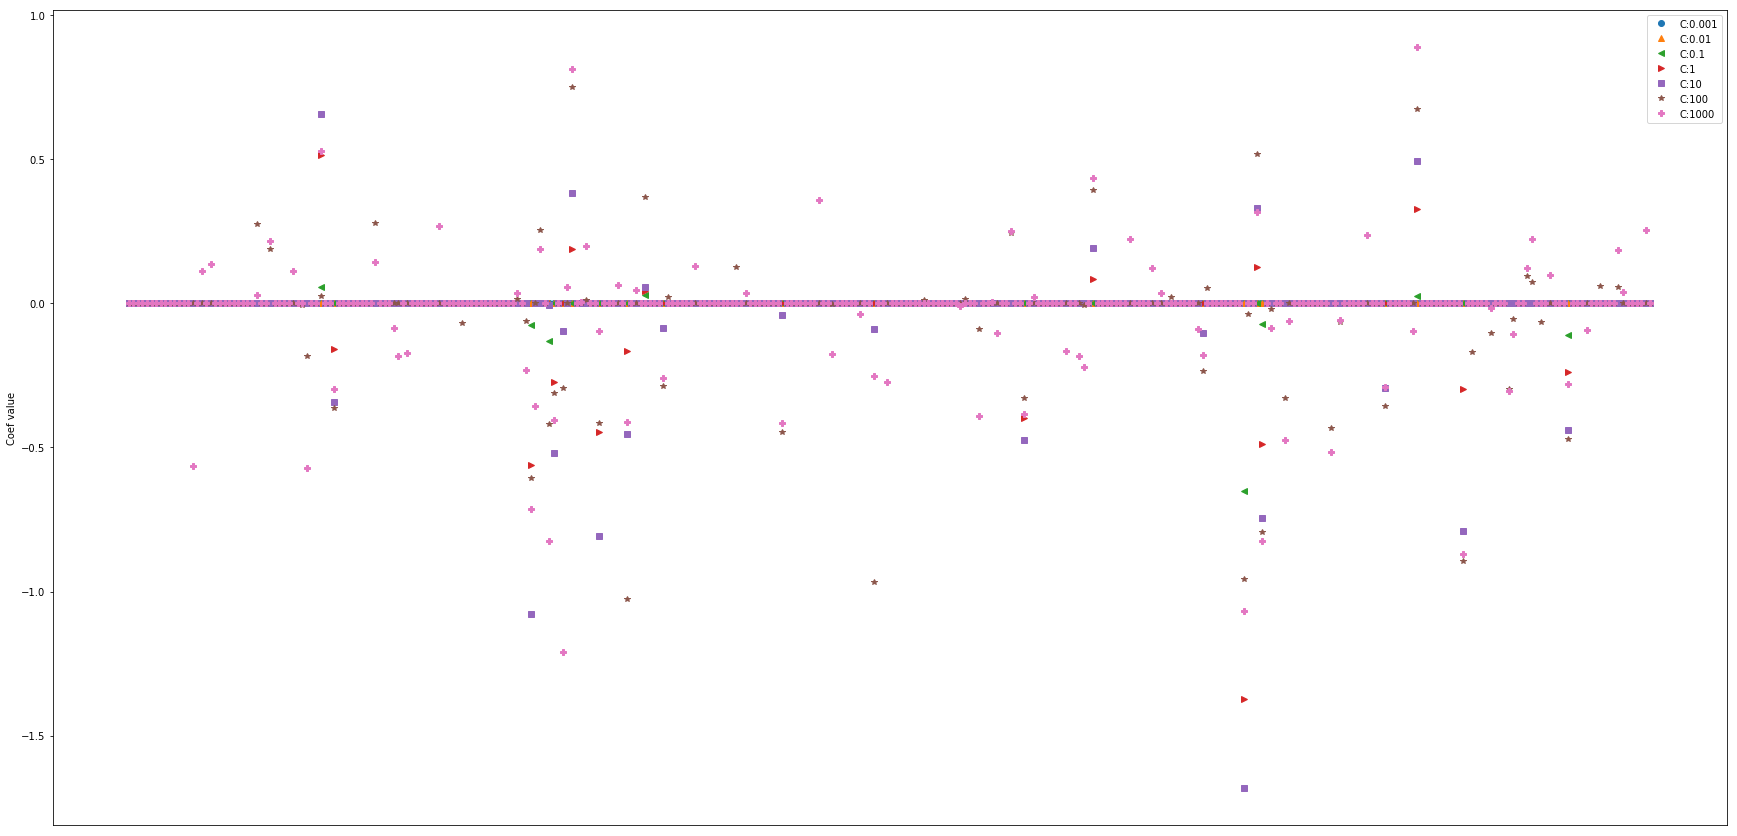

In [221]:
C=[0.001,0.01,0.1,1,10,100,1000]
plt.figure(figsize=(30,15))
for c, marker in zip(C, ['o','^','<','>','s','*','P']):
    lr=LogisticRegression(C=c, penalty='l1')
    lr.fit(X_train,y_train)
    print("C:",c)
    acc(lr)
    plt.plot(lr.coef_.T, marker, label=("C:"+str(c)))
plt.xticks(())
plt.ylabel("Coef value")
plt.legend()
plt.show()

## By Random Forest Classfier

In [222]:
from sklearn.ensemble import RandomForestClassifier

In [223]:
rfc=RandomForestClassifier(n_estimators=10 , random_state=32)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

1.0

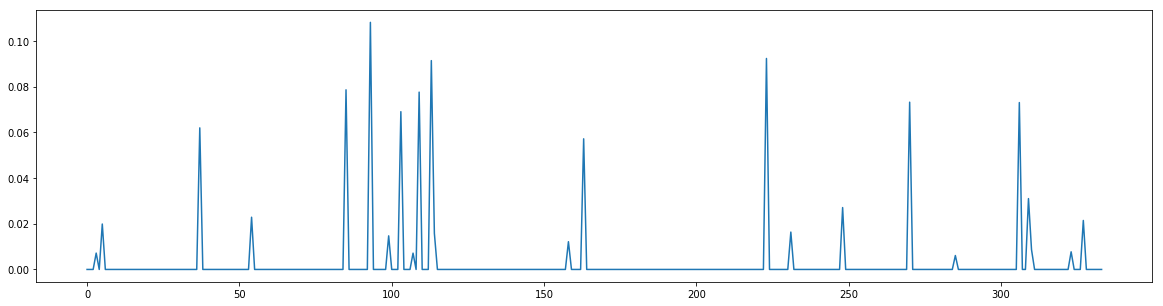

In [224]:
plt.figure(figsize=(20,5))
plt.plot(rfc.feature_importances_)
plt.show()

In [231]:
y_train

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1])

In [233]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [235]:
from sklearn.metrics import confusion_matrix

In [238]:
cnf=confusion_matrix(y,rfc.predict(X_test))

ValueError: Found input variables with inconsistent numbers of samples: [72, 18]

In [237]:
confusion_matrix?

Signature: confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
Docstring:
Compute confusion matrix to evaluate the accuracy of a classification

By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
is equal to the number of observations known to be in group :math:`i` but
predicted to be in group :math:`j`.

Thus in binary classification, the count of true negatives is
:math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
:math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

Read more in the :ref:`User Guide <confusion_matrix>`.

Parameters
----------
y_true : array, shape = [n_samples]
    Ground truth (correct) target values.

y_pred : array, shape = [n_samples]
    Estimated targets as returned by a classifier.

labels : array, shape = [n_classes], optional
    List of labels to index the matrix. This may be used to reorder
    or select a subset of labels.
    If none is given, those that appear at least once
    in ``y_true`` or

#### Well due to less data these models are not very robust